In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# --- Data Collection and Loading ---
# Load dataset and convert to DataFrame:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target


First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrm

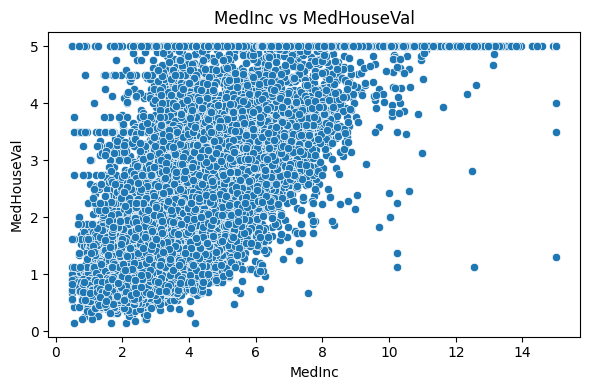

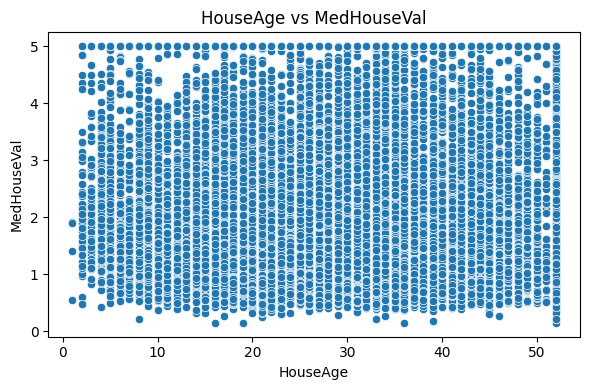

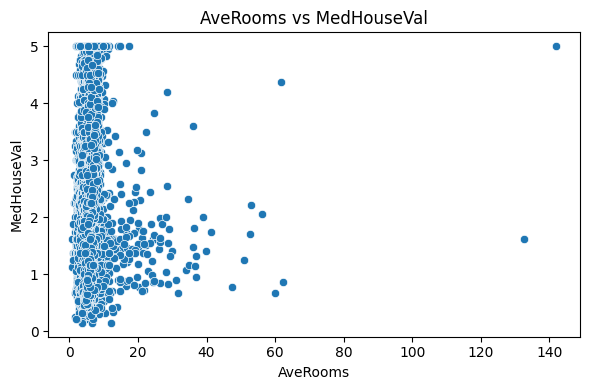

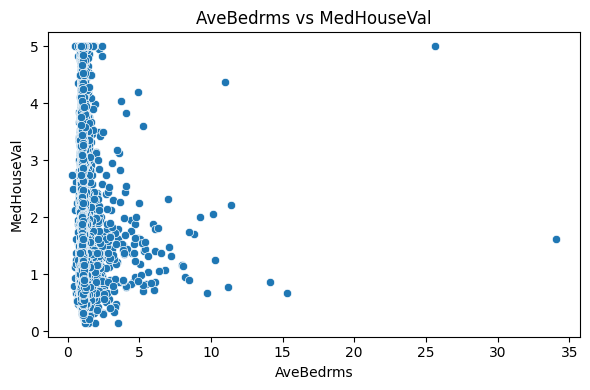

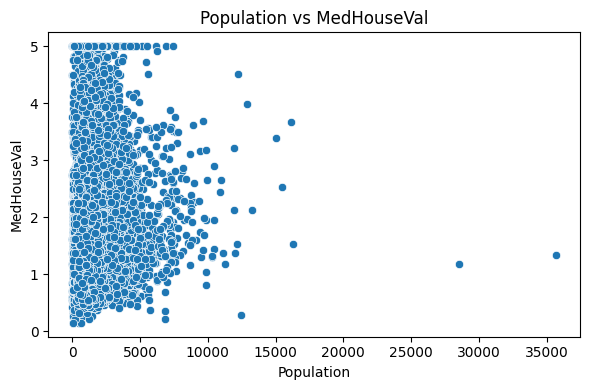

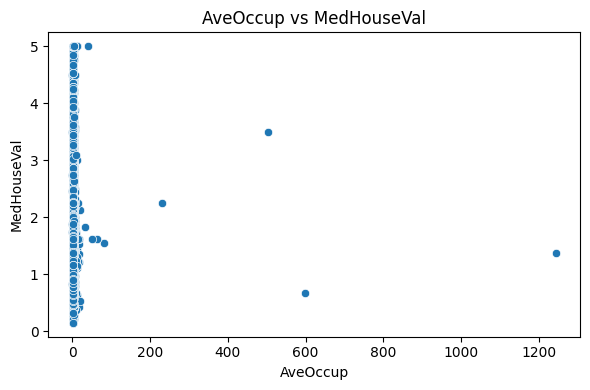

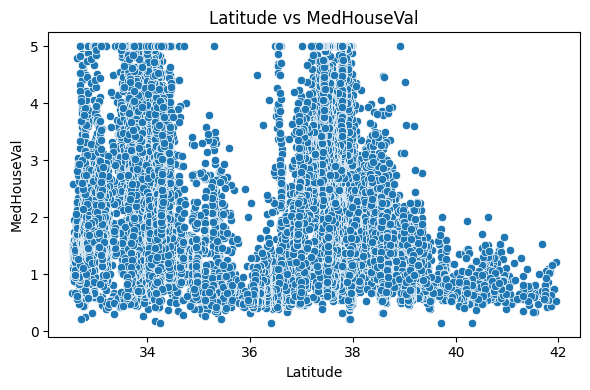

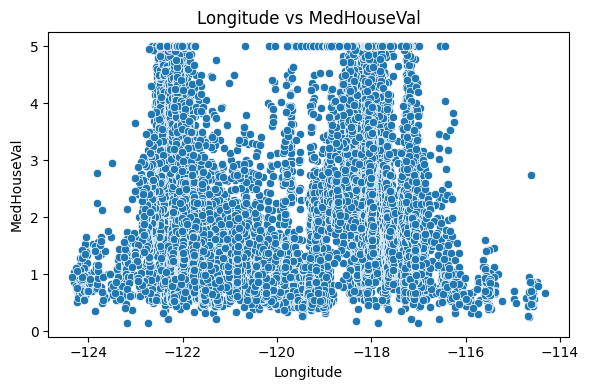


Model Performance on Test Set:
Root Mean Squared Error (RMSE): 0.7456
R-squared (R²): 0.5758

Predicted Median House Value for new input: 4.133


In [2]:
# -------------------------------
# Step 1: Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Step 2: Load the Dataset
# -------------------------------
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# -------------------------------
# Step 3: Quick Check of Data
# -------------------------------
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# -------------------------------
# Step 4: EDA and Preprocessing
# -------------------------------

# Check for nulls
print("\nMissing Values:\n", df.isnull().sum())

# Function to create scatter plots for all features vs MedHouseVal
def scatter_all_features(df, target):
    features = df.columns.drop(target)
    for feature in features:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=feature, y=target)
        plt.title(f'{feature} vs {target}')
        plt.tight_layout()
        plt.show()

# Visualize feature relationships
scatter_all_features(df, 'MedHouseVal')

# -------------------------------
# Step 5: Train-Test Split
# -------------------------------
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 6: Model Training
# -------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------
# Step 7: Model Evaluation
# -------------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# -------------------------------
# Step 8: Predict New Data
# -------------------------------
# Example new input (choose realistic values based on data range)
new_input = pd.DataFrame([{
    'MedInc': 8.5,
    'HouseAge': 25,
    'AveRooms': 5.0,
    'AveBedrms': 1.0,
    'Population': 1200,
    'AveOccup': 3.0,
    'Latitude': 37.0,
    'Longitude': -121.0
}])

predicted_price = model.predict(new_input)[0]
print("\nPredicted Median House Value for new input:", round(predicted_price, 3))
